<a href="https://colab.research.google.com/github/Ppedro-Leal/Enade-DataAnalise/blob/main/Analise_de_dados_ENADE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importando Bibliotecas e montando o drive**

In [ ]:
# Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import numpy as np
from google.colab import files


print("Bibliotecas importadas e configuradas com sucesso!")

Bibliotecas importadas e configuradas com sucesso!


# **Tipos de variaveis:**
| Variável | Tipo | Escala |
|----------|------|--------|
|ID|Númerica | Contínua
|MODALIDADE|Categórica | Nominal
|IDADE| Numérica | Contínua
|SEXO| Categórica | Nominal
|TURNO| Categórica | Nominal
|NOTA_GER| Numérica | Contínua
|NOTA_FORM_GER| Numérica | Contínua
|NOTA_COMPESPE| Numérica | Contínua
|HorasEst| Númerica | Contínua
|CategoriaAdm| Categórica  | Nominal

# **Carregamento dos Dados e Visualização**

In [ ]:
# Ler o arquivo Excel
uploaded = files.upload()

# Ler o arquivo Excel
dados_enade = pd.read_excel('baseEnade17_Sistemas.xlsx')

# Verificação inicial
print(f"\n\nTotal de alunos: {len(dados_enade)}")
print("\n\nPrimeiras linhas do dataset:")
display(dados_enade.head())

KeyboardInterrupt: 

# **Pré-processamento e Limpeza**

In [ ]:
print("="*60)
print("DIAGNÓSTICO DOS DADOS REAIS")
print("="*60)

# Verificando os tipos de dados
print("\nTipos de dados:")
print(dados_enade[['SEXO', 'MODALIDADE', 'TURNO', 'CategoriaAdm']].dtypes)

# Verificando valores NA
print("\nValores faltantes:")
print(dados_enade[['SEXO', 'MODALIDADE', 'TURNO', 'CategoriaAdm']].isna().sum())

# Mapeamento completo dos turnos conforme dicionário
mapeamento_turno = {
    1: 'Matutino',
    2: 'Vespertino',
    3: 'Integral',
    4: 'Noturno'
}

# Mapeando
dados_enade['TURNO'] = dados_enade['TURNO'].map(mapeamento_turno).fillna('Não informado')

# Verificação
print("\nValores únicos na coluna turno após mapeamento:")
print(dados_enade['TURNO'].unique())

# Verificando valores únicos brutos
print("\nValores únicos brutos:")
for col in ['SEXO', 'MODALIDADE', 'TURNO', 'CategoriaAdm']:
    print(f"{col}: {dados_enade[col].unique()}")

DIAGNÓSTICO DOS DADOS REAIS

Tipos de dados:
SEXO            object
MODALIDADE       int64
TURNO            int64
CategoriaAdm    object
dtype: object

Valores faltantes:
SEXO            0
MODALIDADE      0
TURNO           0
CategoriaAdm    0
dtype: int64

Valores únicos na coluna TURNO após mapeamento:
['Noturno' 'Integral' 'Matutino']

Valores únicos brutos (incluindo NA):
SEXO: ['M' 'F']
MODALIDADE: [1 0]
TURNO: ['Noturno' 'Integral' 'Matutino']
CategoriaAdm: ['Privada' 'Publica']


# **Análise do Perfil dos Alunos**

In [ ]:
print("="*60)
print("ANÁLISE DESCRITIVA DOS ALUNOS")
print("="*60)

# Contagem total
print(f"\nTotal de alunos: {len(dados_enade)}")

# Função para análise de coluna categórica
def analisar_coluna(df, coluna):
    contagem = df[coluna].value_counts(dropna=False)
    porcentagem = (df[coluna].value_counts(normalize=True, dropna=False) * 100).round(1)
    return pd.DataFrame({'Contagem': contagem, 'Porcentagem (%)': porcentagem})

# Análise para cada coluna
print("\nDistribuição por Sexo:")
display(analisar_coluna(dados_enade, 'SEXO'))

print("\nDistribuição por Modalidade:")
display(analisar_coluna(dados_enade, 'MODALIDADE'))

print("\nDistribuição por Turno:")
display(analisar_coluna(dados_enade, 'TURNO'))

print("\nDistribuição por Categoria Administrativa:")
display(analisar_coluna(dados_enade, 'CategoriaAdm'))

ANÁLISE DESCRITIVA COM DADOS CORRIGIDOS

Total de alunos: 125

Distribuição por Sexo:


,Contagem,Porcentagem (%)
SEXO,,
M,108,86.4
F,17,13.6



Distribuição por Modalidade:


,Contagem,Porcentagem (%)
MODALIDADE,,
1,106,84.8
0,19,15.2



Distribuição por Turno:


,Contagem,Porcentagem (%)
TURNO,,
4,80,64.0
1,25,20.0
3,20,16.0



Distribuição por Categoria Administrativa:


,Contagem,Porcentagem (%)
CategoriaAdm,,
Privada,91,72.8
Publica,34,27.2


### **Gráfico de Distribuição de alunos por Sexo**

DISTRIBUIÇÃO DE ALUNOS POR SEXO

Este gráfico mostra a distribuição dos alunos por sexo (Masculino/Feminino).



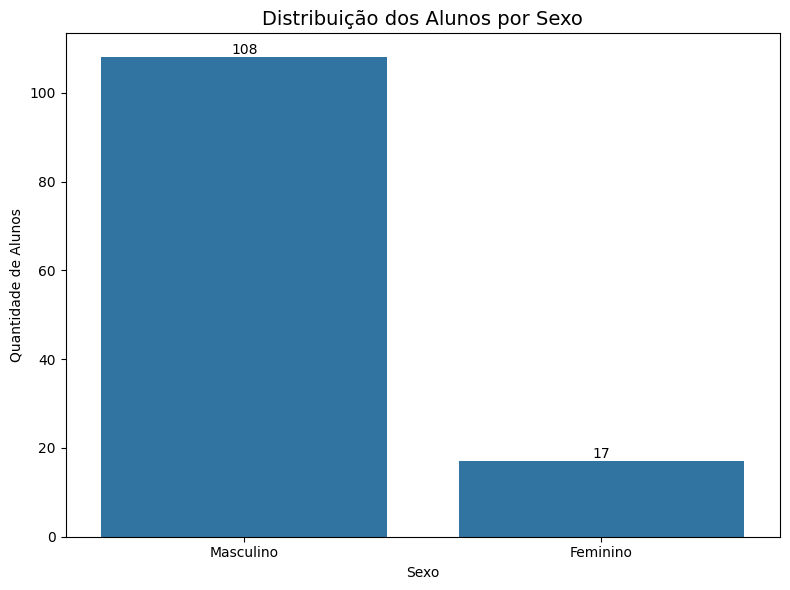

In [ ]:
print("="*80)
print("DISTRIBUIÇÃO DE ALUNOS POR SEXO")
print("="*80)
print("\nEste gráfico mostra a distribuição dos alunos por sexo (Masculino/Feminino).\n")

plt.figure(figsize=(8, 6))
sns.countplot(data=dados_enade, x='SEXO', order=['M', 'F'])
plt.title('Distribuição dos Alunos por Sexo', fontsize=14)
plt.xlabel('Sexo')
plt.ylabel('Quantidade de Alunos')
plt.xticks([0, 1], ['Masculino', 'Feminino'])

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}',
                      (p.get_x() + p.get_width()/2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 5),
                      textcoords='offset points')

plt.tight_layout()
plt.show()

### **Gráfico de Distribuição de alunos por Turno**


DISTRIBUIÇÃO POR TURNO

Este gráfico mostra a distribuição dos alunos por turno de estudo.



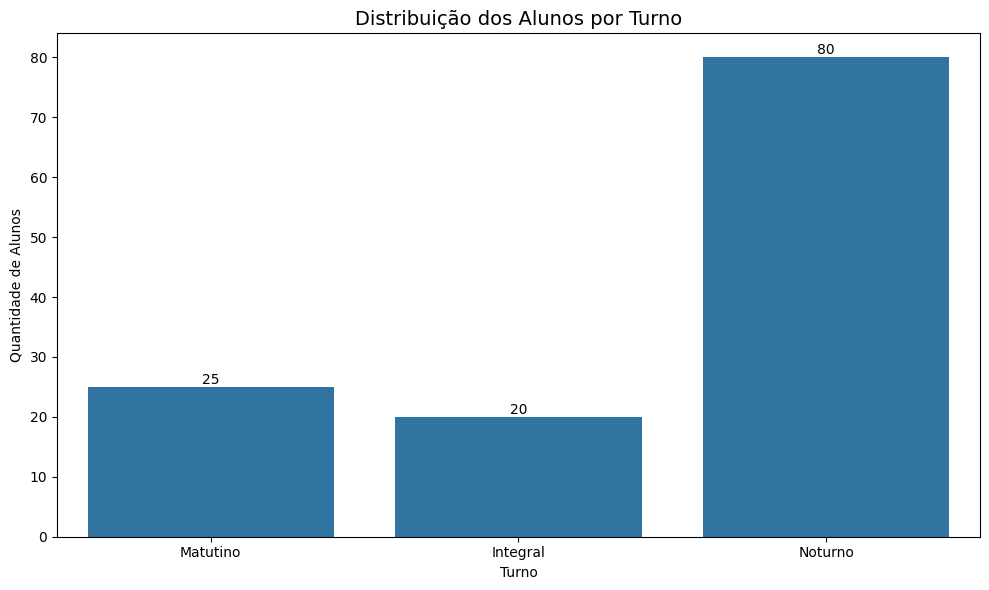

In [ ]:
print("\n" + "="*80)
print("DISTRIBUIÇÃO POR TURNO")
print("="*80)

plt.figure(figsize=(10, 6))
order = ['Matutino', 'Integral', 'Noturno']
sns.countplot(data=dados_enade, x='TURNO', order=order)
plt.title('Distribuição dos Alunos por Turno', fontsize=14)
plt.xlabel('Turno')
plt.ylabel('Quantidade de Alunos')

# Adicionando os valores nas barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}',
                      (p.get_x() + p.get_width()/2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 5),
                      textcoords='offset points')

plt.tight_layout()
plt.show()

### **Gráfico de Distribuição de alunos por Modalidade**


DISTRIBUIÇÃO POR MODALIDADE


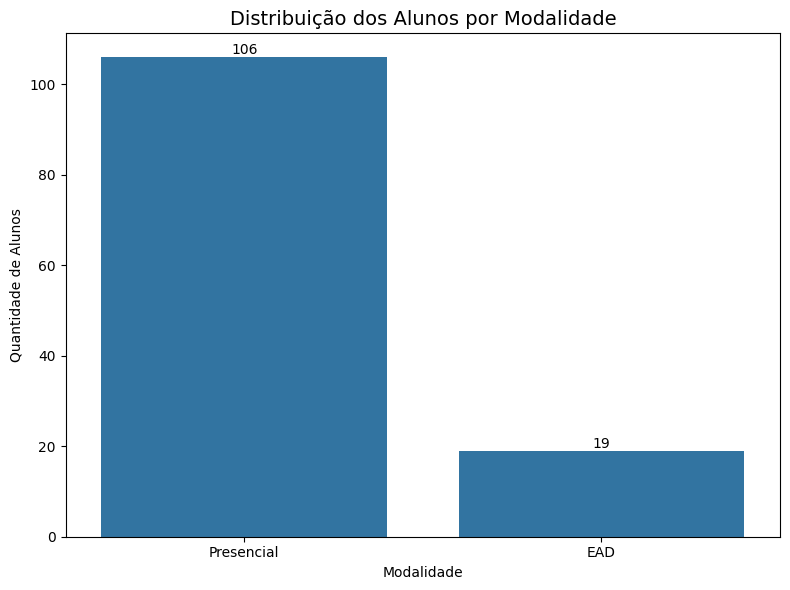

In [ ]:
print("\n" + "="*80)
print("DISTRIBUIÇÃO POR MODALIDADE")
print("="*80)

plt.figure(figsize=(8, 6))
sns.countplot(data=dados_enade, x='MODALIDADE', order=['1', '0'])
plt.title('Distribuição dos Alunos por Modalidade', fontsize=14)
plt.xlabel('Modalidade')
plt.ylabel('Quantidade de Alunos')
plt.xticks([0, 1], ['Presencial', 'EAD'])

# Adicionando os valores nas barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}',
                      (p.get_x() + p.get_width()/2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 5),
                      textcoords='offset points')

plt.tight_layout()
plt.show()

### **Gráfico de Distribuição de alunos por Categoria Administrativa**


DISTRIBUIÇÃO POR CATEGORIA ADMINISTRATIVA


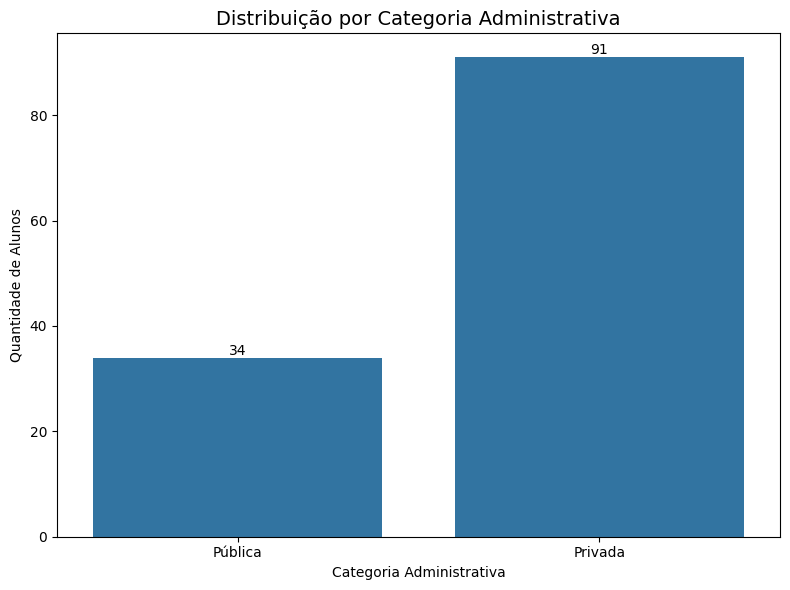

In [ ]:
print("\n" + "="*80)
print("DISTRIBUIÇÃO POR CATEGORIA ADMINISTRATIVA")
print("="*80)

plt.figure(figsize=(8, 6))
sns.countplot(data=dados_enade, x='CategoriaAdm', order=['Publica', 'Privada'])
plt.title('Distribuição por Categoria Administrativa', fontsize=14)
plt.xlabel('Categoria Administrativa')
plt.ylabel('Quantidade de Alunos')
plt.xticks([0, 1], ['Pública', 'Privada'])


for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}',
                      (p.get_x() + p.get_width()/2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 5),
                      textcoords='offset points')

plt.tight_layout()
plt.show()

# **Tabela de Contingência (Modalidade × Turno)**

RELAÇÃO ENTRE MODALIDADE E TURNO DE ESTUDO


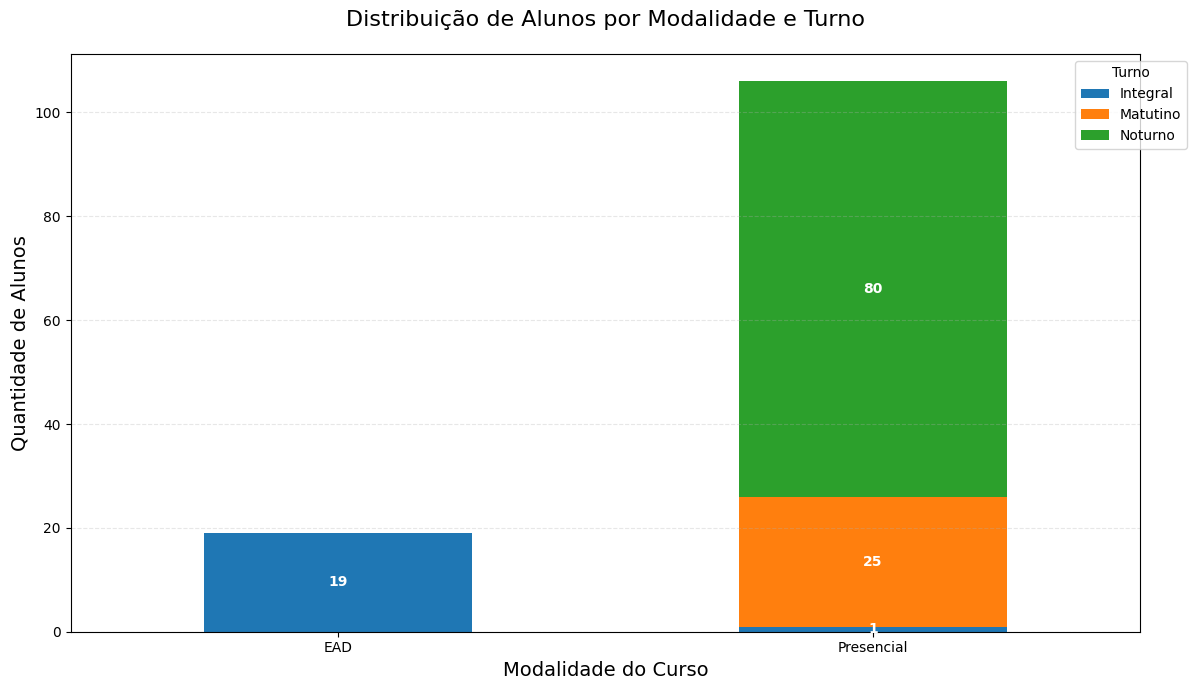

In [ ]:
print("="*80)
print("RELAÇÃO ENTRE MODALIDADE E TURNO DE ESTUDO")
print("="*80)

# Tabela de contingência com totais
tabela_contingencia = pd.crosstab(
    dados_enade['MODALIDADE'],
    dados_enade['TURNO'],
    margins=True,
    margins_name="Total"
)


# Gráfico de barras empilhadas
tabela_contingencia.iloc[:-1, :-1].plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
)

# Configurações de textos da tabela
plt.title('Distribuição de Alunos por Modalidade e Turno', fontsize=16, pad=20)
plt.xlabel('Modalidade do Curso', fontsize=14)
plt.ylabel('Quantidade de Alunos', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Turno', bbox_to_anchor=(1.05, 1))
plt.xticks([0, 1], ['EAD', 'Presencial'])
plt.grid(axis='y', linestyle='--', alpha=0.3)


# Colocação de numeração no gráfico
for rect in plt.gca().patches:
    height = rect.get_height()
    if height > 0:
        plt.gca().text(
            rect.get_x() + rect.get_width()/2.,
            rect.get_y() + height/2,
            f'{int(height)}',
            ha='center',
            va='center',
            color='white',
            fontweight='bold'
        )

plt.tight_layout()
plt.show()

# **Análise Descritiva das Notas**


ANÁLISE DESCRITIVA GERAL DAS NOTAS

Estatísticas descritivas das notas gerais:


,NOTA_GERAL
count,125.000000
mean,38.880800
std,13.190519
min,12.800000
25%,30.100000
50%,39.600000
75%,46.700000
max,83.800000


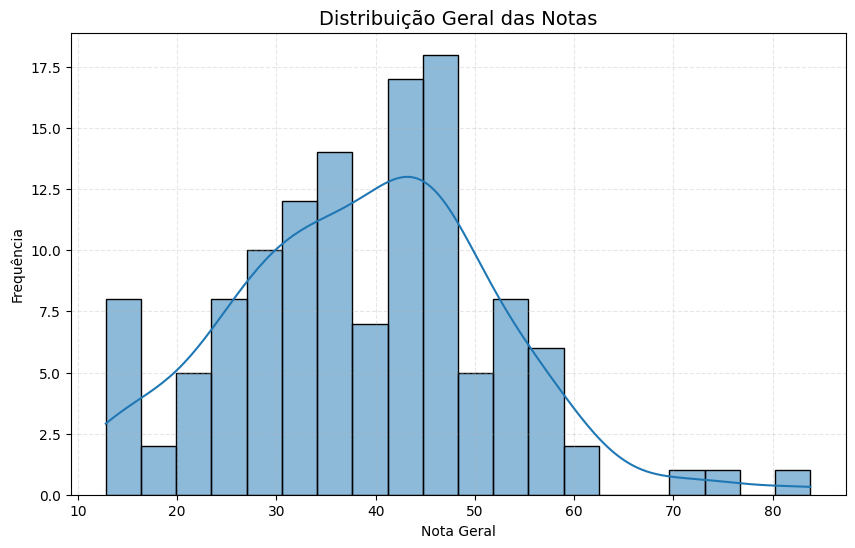

In [ ]:
print("\n" + "="*80)
print("ANÁLISE DESCRITIVA GERAL DAS NOTAS")
print("="*80)

descricao_geral = dados_enade['NOTA_GERAL'].describe(percentiles=[.25, .5, .75])
print("\nEstatísticas descritivas das notas gerais:")
display(descricao_geral)

# Histograma geral
plt.figure(figsize=(10, 6))
sns.histplot(dados_enade['NOTA_GERAL'], bins=20, kde=True)
plt.title('Distribuição Geral das Notas', fontsize=14)
plt.xlabel('Nota Geral')
plt.ylabel('Frequência')
plt.grid(linestyle='--', alpha=0.3)
plt.show()

### **Análise por Modalidade**


COMPARAÇÃO ENTRE MODALIDADES

Estatísticas descritivas por modalidade:


,count,mean,std,min,25%,Mediana,75%,max
MODALIDADE,,,,,,,,
EAD,106.0,38.344340,13.855582,12.8,28.225,37.45,46.775,83.8
Presencial,19.0,41.873684,8.220695,21.1,37.700,43.00,45.500,61.8



Coeficiente de Variação por Modalidade:


,NOTA_GERAL
MODALIDADE,
EAD,36.13
Presencial,19.63


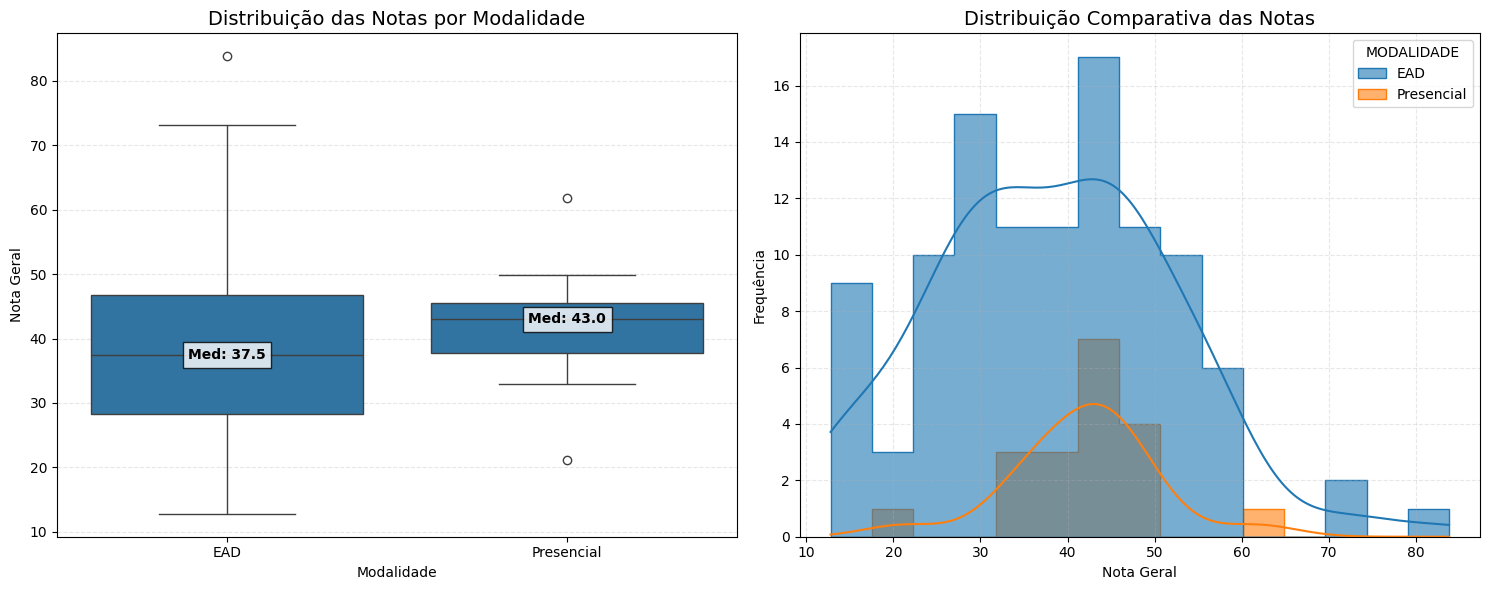

In [ ]:
print("\n" + "="*80)
print("COMPARAÇÃO ENTRE MODALIDADES")
print("="*80)

# Substituição valores numéricos por rótulos descritivos
dados_enade['MODALIDADE'] = dados_enade['MODALIDADE'].replace({0: 'Presencial', 1: 'EAD'})

# Estatísticas descritivas por modalidade
print("\nEstatísticas descritivas por modalidade:")
descricao_modalidade = dados_enade.groupby('MODALIDADE')['NOTA_GERAL']\
    .describe(percentiles=[.25, .5, .75])\
    .rename(columns={'50%': 'Mediana'})

display(descricao_modalidade)

# Coeficiente de variação por modalidade
cv = dados_enade.groupby('MODALIDADE')['NOTA_GERAL'].agg(lambda x: (x.std()/x.mean())*100)
print("\nCoeficiente de Variação por Modalidade:")
display(cv.round(2))


# Visualização comparativa
plt.figure(figsize=(15, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='MODALIDADE', y='NOTA_GERAL', data=dados_enade)
plt.title('Distribuição das Notas por Modalidade', fontsize=14)
plt.xlabel('Modalidade')
plt.xticks([0, 1], ['EAD', 'Presencial'])
plt.ylabel('Nota Geral')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adicionando medianas
medians = dados_enade.groupby('MODALIDADE')['NOTA_GERAL'].median()
for i, mod in enumerate(medians.index):
    plt.text(i, medians[mod], f'Med: {medians[mod]:.1f}',
             ha='center', va='center', fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.8))

# Histograma comparativo
plt.subplot(1, 2, 2)
sns.histplot(data=dados_enade, x='NOTA_GERAL', hue='MODALIDADE',
             bins=15, kde=True, alpha=0.6, element='step')
plt.title('Distribuição Comparativa das Notas', fontsize=14)
plt.xlabel('Nota Geral')
plt.ylabel('Frequência')
plt.grid(linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

### **Análise adicional: Notas por Categoria Administrativa**


ANÁLISE POR CATEGORIA ADMINISTRATIVA

Estatísticas descritivas por categoria administrativa:


,count,mean,std,min,25%,Mediana,75%,max
CategoriaAdm,,,,,,,,
Privada,91.0,35.885714,12.043999,12.8,27.2,36.80,44.550,70.7
Publica,34.0,46.897059,12.931462,21.6,39.5,46.75,55.275,83.8


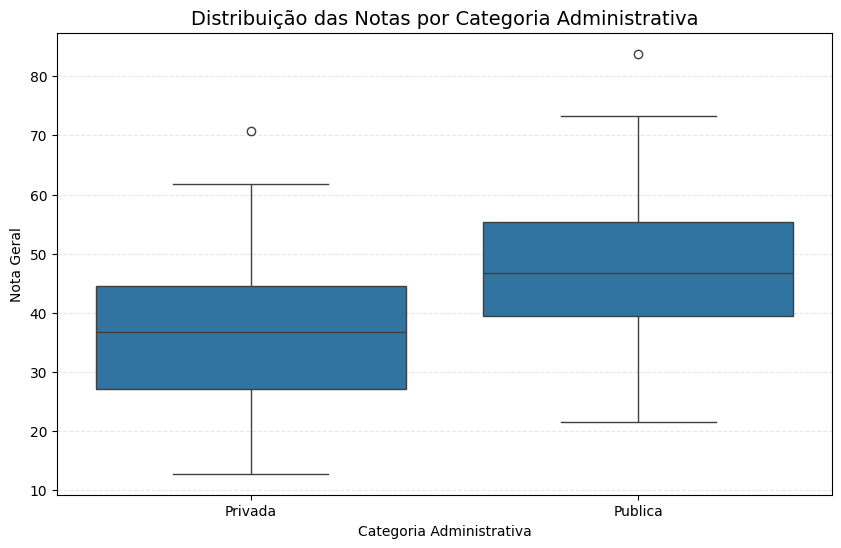

In [ ]:
print("\n" + "="*80)
print("ANÁLISE POR CATEGORIA ADMINISTRATIVA")
print("="*80)

# Estatísticas por categoria administrativa
print("\nEstatísticas descritivas por categoria administrativa:")
descricao_categoria = dados_enade.groupby('CategoriaAdm')['NOTA_GERAL']\
    .describe(percentiles=[.25, .5, .75])\
    .rename(columns={'50%': 'Mediana'})

display(descricao_categoria)

# Boxplot por categoria administrativa
plt.figure(figsize=(10, 6))
sns.boxplot(x='CategoriaAdm', y='NOTA_GERAL', data=dados_enade)
plt.title('Distribuição das Notas por Categoria Administrativa', fontsize=14)
plt.xlabel('Categoria Administrativa')
plt.ylabel('Nota Geral')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

# **Considerações finais**

A análise dos dados do ENADE para os cursos de Sistemas nos permitiu compreender melhor a distribuição dos alunos em diferentes categorias, como sexo, modalidade de ensino, turno e categoria administrativa. Observamos que:


* A distribuição por sexo apresenta um certo equilíbrio, mas com leve predominância de um dos grupos.

* A maioria dos alunos está matriculada na modalidade presencial, mas há uma parcela significativa no ensino a distância (EAD), o que reflete a crescente adesão a essa forma de ensino.

* O turno noturno concentra um grande número de alunos, sugerindo que muitos conciliam trabalho e estudo.

* A divisão entre instituições públicas e privadas indica possíveis diferenças de acesso e estrutura acadêmica.


Em relação ao desempenho dos alunos, a análise descritiva das notas revelou padrões interessantes. A modalidade presencial tende a apresentar um desempenho ligeiramente superior à EAD, conforme indicado pelas estatísticas descritivas e coeficiente de variação. No entanto, a diferença pode ser influenciada por diversos fatores, como perfil socioeconômico dos estudantes e metodologias de ensino adotadas em cada modalidade.


Por fim, as visualizações gráficas foram fundamentais para identificar padrões e tendências nos dados. Elas facilitaram a interpretação dos resultados e permitiram uma análise mais intuitiva e comparativa. Futuras investigações podem explorar fatores adicionais que influenciam o desempenho acadêmico, como infraestrutura, suporte pedagógico e engajamento dos alunos.


Essa análise demonstra a importância do uso de técnicas estatísticas e visuais para a extração de insights relevantes em bases de dados educacionais, contribuindo para uma melhor compreensão do cenário acadêmico e possíveis melhorias no ensino.